In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import spacy
import re

### NOTE: Due to the long running time of cleaning the reviews, a file with cleaned reviews is generated beforehand.

# Comparing Raw and Cleaned Movie Review

In [26]:
df = pd.read_csv("./movie_reviews_cleaned.csv")
print("Original Review:\n")
print(df['review'][0])
print("Length: ", len(df['review'][0]))
print("------------------------------")
print("Cleaned Review:\n")
print(df['cleaned_review'][0])
print("Length: ", len(df['cleaned_review'][0]))

Original Review:

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show

In [0]:
'''
nlp = spacy.load("en_core_web_sm")
doc = nlp("story man unnatural feel pig start open scene terrific example absurd comedy formal orchestra audience turn insane violent mob crazy chant singers unfortunately stay absurd whole time general narrative eventually make put even era turn cryptic dialogue would make shakespeare seem easy third grader technical level better might think good cinematography future great vilmos zsigmond future star sally kirkland frederic forrest see briefly")
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

text = " This is an important text "
toks = nltk.word_tokenize(text)
x = text.split(' ')
print(x)
print(toks)
'''

'\nnlp = spacy.load("en_core_web_sm")\ndoc = nlp("story man unnatural feel pig start open scene terrific example absurd comedy formal orchestra audience turn insane violent mob crazy chant singers unfortunately stay absurd whole time general narrative eventually make put even era turn cryptic dialogue would make shakespeare seem easy third grader technical level better might think good cinematography future great vilmos zsigmond future star sally kirkland frederic forrest see briefly")\nfor ent in doc.ents:\n    print(ent.text, ent.start_char, ent.end_char, ent.label_)\n\ntext = " This is an important text "\ntoks = nltk.word_tokenize(text)\nx = text.split(\' \')\nprint(x)\nprint(toks)\n'

# Data Exploration

## Negative Reviews Exploration

In [0]:
neg_df = df[df['label']==0]
num_sample, num_col = neg_df.shape
print("There are %d negative reviews." % num_sample)

There are 25000 negative reviews.


### Top 20 POS Pattern (Using original reviews)

In [0]:
def build_reverse_dict(target_dict):
    count_rev_dict = {}
    for k,v in target_dict.items():
        if count_rev_dict.get(v)==None:
            count_rev_dict[v] = [k]
        else:
            count_rev_dict[v] += [k]
    return count_rev_dict

def find_top_n_words(rev_dict, n = 20):
    result = []
    sorted_key = list(rev_dict.keys())
    sorted_key.sort(reverse=True)
    while len(result)!=n:
        for key in sorted_key:
            current_list = rev_dict[key]
            for word in current_list:
                if word=="br" or word=="< br": #special case
                    continue
                result.append(word)
                if len(result)==n:
                    return result
    return result

def build_pattern_dict(target_df, num_sample, first_pos, second_pos, starting_index = 0):
    pattern_dict = {}
    pattern_list = [first_pos, second_pos]
    for i in range(starting_index, starting_index + num_sample):
        review = target_df['review'][i]
        review = review.lower()
        regex = re.compile("<.*?>")
        review = re.sub(regex, '', review)
        tokens = nltk.word_tokenize(review)
        pos_tag_list = nltk.pos_tag(tokens)
        for i in range(len(pos_tag_list)-1):
            word_list = []
            for j in range(2):
                if pos_tag_list[j+i][1]==pattern_list[j]:
                    word_list.append(pos_tag_list[j+i][0])
            if len(word_list)==2:
                combined = " ".join(word_list)
                if pattern_dict.get(combined)==None:
                    pattern_dict[combined] = 1
                else:
                    pattern_dict[combined]+=1
            else:
                word_list = []
    return pattern_dict

def build_n_gram_dict(target_df, num_sample, starting_index = 0, n = 2):
    n_gram_dict = {}
    for i in range(starting_index, starting_index + num_sample):
        review = target_df['cleaned_review'][i]
        tokens = review.split(" ")
        tokens = [x for x in tokens if x!="br"]
        for i in range(len(tokens)-(n-1)):
            word_list = []
            for j in range(n):
                word_list.append(tokens[i+j])
            combined = " ".join(word_list)
            if n_gram_dict.get(combined)==None:
                n_gram_dict[combined] = 1
            else:
                n_gram_dict[combined]+=1
    return n_gram_dict

In [0]:
my_dict = build_n_gram_dict(neg_df, num_sample, n=2)
my_rev_dict = build_reverse_dict(my_dict)
top_terms = find_top_n_words(my_rev_dict)
print("Top 20 2-Gram (Negative):\n%s" % top_terms)
print("")

my_dict = build_n_gram_dict(neg_df, num_sample, n=3)
my_rev_dict = build_reverse_dict(my_dict)
top_terms = find_top_n_words(my_rev_dict)
print("Top 20 3-Gram (Negative):\n%s" % top_terms)
print("")

my_dict = build_n_gram_dict(neg_df, num_sample, n=4)
my_rev_dict = build_reverse_dict(my_dict)
top_terms = find_top_n_words(my_rev_dict)
print("Top 20 4-Gram (Negative):\n%s" % top_terms)

KeyError: ignored

In [0]:
'''
def build_reverse_dict(target_dict):
    count_rev_dict = {}
    for k,v in target_dict.items():
        if count_rev_dict.get(v)==None:
            count_rev_dict[v] = [k]
        else:
            count_rev_dict[v] += [k]
    return count_rev_dict

def find_top_n_words(rev_dict, n = 20):
    result = []
    sorted_key = list(rev_dict.keys())
    sorted_key.sort(reverse=True)
    while len(result)!=n:
        for key in sorted_key:
            current_list = rev_dict[key]
            for word in current_list:
                if word=="br" or word=="< br": #special case
                    continue
                result.append(word)
                if len(result)==n:
                    return result
    return result

def build_pattern_dict(target_df, num_sample, first_pos, second_pos, starting_index = 0):
    pattern_dict = {}
    pattern_list = [first_pos, second_pos]
    for i in range(starting_index, starting_index + num_sample):
        review = target_df['review'][i]
        review = review.lower()
        tokens = nltk.word_tokenize(review)
        pos_tag_list = nltk.pos_tag(tokens)
        for i in range(len(pos_tag_list)-1):
            word_list = []
            for j in range(2):
                if pos_tag_list[j+i][1]==pattern_list[j]:
                    word_list.append(pos_tag_list[j+i][0])
            if len(word_list)==2:
                combined = " ".join(word_list)
                if pattern_dict.get(combined)==None:
                    pattern_dict[combined] = 1
                else:
                    pattern_dict[combined]+=1
            else:
                word_list = []
    return pattern_dict
'''
my_dict = build_pattern_dict(neg_df, num_sample, "JJ", "NN")
my_rev_dict = build_reverse_dict(my_dict)
top_terms = find_top_n_words(my_rev_dict)
print("Top 20 POS Patterns (JJ NN- Negative):\n%s" % top_terms)
print("")

my_dict = build_pattern_dict(neg_df, num_sample, "VBP", "NN")
my_rev_dict = build_reverse_dict(my_dict)
top_terms = find_top_n_words(my_rev_dict)
print("Top 20 POS Patterns (VBP NN- Negative):\n%s" % top_terms)
print("")

my_dict = build_pattern_dict(neg_df, num_sample, "NN", "NN")
my_rev_dict = build_reverse_dict(my_dict)
top_terms = find_top_n_words(my_rev_dict)
print("Top 20 POS Patterns (NN NN- Negative):\n%s" % top_terms)

### Top 20 Terms (Using cleaned reviews)

In [0]:
def build_occur_dict(target_df, num_sample, starting_index = 0):
    count_dict = {}
    for i in range(starting_index, starting_index + num_sample):
        review = target_df['cleaned_review'][i]
        for word in review.split(" "):
            if count_dict.get(word)==None:
                count_dict[word] = 1
            else:
                count_dict[word] += 1
    return count_dict

my_dict = build_occur_dict(neg_df, num_sample)
my_rev_dict = build_reverse_dict(my_dict)
top_terms = find_top_n_words(my_rev_dict)
print("Top 20 Terms (Negative):\n%s" % top_terms)

KeyError: ignored

# Dimension Reduction Analysis

In [0]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
#Projects to dimension specified. Default=2
def project_nd(data,label, num_comp=2):
    svd = TruncatedSVD(n_components=num_comp)
    projected = svd.fit_transform(data)
    print(projected.shape)
    plt.scatter(projected[:, 0], projected[:, 1], edgecolor='none', alpha=0.5)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show();
    return projected

def components_analysis(data,num_comp=200):
    svd = TruncatedSVD(n_components=num_comp).fit(data)
    plt.plot(np.cumsum(svd.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.show()
    print("Explained variance ratio sum of %d components: %f" % (num_comp,svd.explained_variance_ratio_.sum()))

## TruncatedSVD (CountVectorizer)

In [0]:
X = df['cleaned_review'].values
y = df['label'].values

count_vect_def = CountVectorizer()
count_vect = CountVectorizer(min_df=2)

X_count_def = count_vect_def.fit_transform(X)
X_count = count_vect.fit_transform(X)
print("Number of unique vocabulary (min_df=1): %d" % len(count_vect_def.get_feature_names()))
print("Number of unique vocabulary (min_df=2): %d" % len(count_vect.get_feature_names()))

Number of unique vocabulary (min_df=1): 101895
Number of unique vocabulary (min_df=2): 59845


(50000, 2)


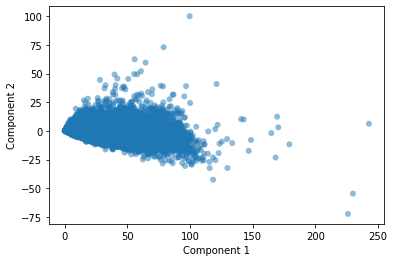

KeyboardInterrupt: ignored

In [24]:
project_nd(X_count, y)
components_analysis(X_count, num_comp=4000)

## TruncatedSVD (TfidfVectorizer)

In [0]:
tfidf_vect_def = TfidfVectorizer()
tfidf_vect = TfidfVectorizer(min_df=2)

X_tfidf_def = tfidf_vect_def.fit_transform(X)
X_tfidf = tfidf_vect.fit_transform(X)
print("Number of unique vocabulary (min_df=1): %d" % len(tfidf_vect_def.get_feature_names()))
print("Number of unique vocabulary (min_df=2): %d" % len(tfidf_vect.get_feature_names()))

Number of unique vocabulary (min_df=1): 86237
Number of unique vocabulary (min_df=2): 48565


(50000, 2)


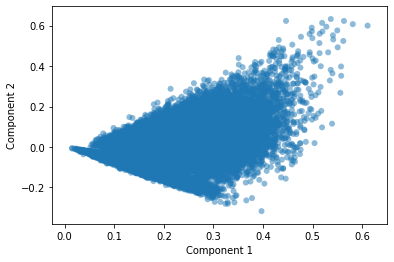

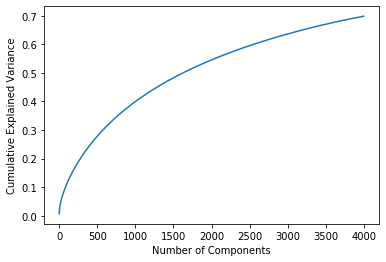

Explained variance ratio sum of 4000 components: 0.698443


In [0]:
project_nd(X_tfidf, y)
components_analysis(X_tfidf, num_comp=4000)

## Positive Reviews Exploration

In [0]:
pos_df = df[df['label']==1]
num_sample, num_col = pos_df.shape
print("There are %d positive reviews." % num_sample)

There are 25000 positive reviews.


### Top 20 N-Gram (Using cleaned reviews)

In [0]:
my_dict = build_n_gram_dict(pos_df, num_sample, num_sample, n=2)
my_rev_dict = build_reverse_dict(my_dict)
top_terms = find_top_n_words(my_rev_dict)
print("Top 20 2-Gram (Positive):\n%s" % top_terms)
print("")

my_dict = build_n_gram_dict(pos_df, num_sample, num_sample, n=3)
my_rev_dict = build_reverse_dict(my_dict)
top_terms = find_top_n_words(my_rev_dict)
print("Top 20 3-Gram (Positive):\n%s" % top_terms)
print("")

my_dict = build_n_gram_dict(pos_df, num_sample,num_sample, n=4)
my_rev_dict = build_reverse_dict(my_dict)
top_terms = find_top_n_words(my_rev_dict)
print("Top 20 4-Gram (Positive):\n%s" % top_terms)

Top 20 2-Gram (Positive):
['one best', 'see movie', 'watch movie', 'film make', 'even though', 'ever see', 'see film', 'first time', 'make film', 'look like', 'highly recommend', 'new york', 'main character', 'must see', 'special effect', 'watch film', 'take place', 'make movie', 'real life', 'years ago']

Top 20 3-Gram (Positive):
['new york city', 'film ever make', 'world war ii', 'one best film', 'one best movies', 'film ever see', 'movie ever see', 'base true story', 'movies ever see', 'well worth watch', 'first time saw', 'would like see', 'would love see', 'first saw movie', 'see long time', 'go see movie', 'highly recommend movie', 'international film festival', 'rock n roll', 'movies ever make']

Top 20 4-Gram (Positive):
['one best movies ever', 'one best movies see', 'best movie ever see', 'one best film see', 'vote eight title brazil', 'one best film ever', 'vote seven title brazil', 'well write well act', 'tony hawk pro skater', 'best movies ever see', 'good guy bad guy', '

### Top 20 POS Pattern (Using original reviews)

In [0]:
my_dict = build_pattern_dict(pos_df, num_sample, "JJ", "NN", num_sample)
my_rev_dict = build_reverse_dict(my_dict)
top_terms = find_top_n_words(my_rev_dict)
print("Top 20 POS Patterns (JJ NN- Positive):\n%s" % top_terms)
print("")

my_dict = build_pattern_dict(pos_df, num_sample, "VBP", "NN", num_sample)
my_rev_dict = build_reverse_dict(my_dict)
top_terms = find_top_n_words(my_rev_dict)
print("Top 20 POS Patterns (VBP NN- Positive):\n%s" % top_terms)
print("")

my_dict = build_pattern_dict(pos_df, num_sample, "NN", "NN", num_sample)
my_rev_dict = build_reverse_dict(my_dict)
top_terms = find_top_n_words(my_rev_dict)
print("Top 20 POS Patterns (NN NN- Positive):\n%s" % top_terms)

Top 20 POS Patterns (JJ NN- Positive):
['first time', 'new york', 'same time', 'great movie', 'real life', 'good movie', 'high school', 'great film', 'long time', 'main character', 'good job', 'great job', 'low budget', 'young man', 'good film', 'little bit', 'true story', 'first film', 'other hand', 'i guess']

Top 20 POS Patterns (VBP NN- Positive):
['know i', 'are plenty', 'have nothing', 'think i', 'take place', 'wish i', 'are part', 'are nothing', 'have something', 'know nothing', 'are way', 'think everyone', 'want something', 'love lucy', 'believe i', 'are today', 'have sex', 'am glad', 'know something', 'have trouble']

Top 20 POS Patterns (NN NN- Positive):
['movie i', 'film i', 'time i', 'world war', 'horror film', 'film festival', 'love story', 'tv series', 'story line', 'horror movie', 'thing i', 'character development', 'science fiction', 'tv show', 'camera work', 'york city', 'box office', 'motion picture', 'star trek', 'action movie']


### Top 20 Terms (Using cleaned reviews)

In [0]:
my_dict = build_occur_dict(pos_df, num_sample, num_sample)
my_rev_dict = build_reverse_dict(my_dict)
top_terms = find_top_n_words(my_rev_dict)
print("Top 20 Terms (Positive):\n%s" % top_terms)

# Modeling

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

## Helper Functions

In [0]:
from sklearn.metrics import classification_report

## Load Testing Data

In [0]:
df_test = pd.read_csv("./movie_reviews_cleaned_test.csv")

In [0]:
X_train = df['cleaned_review'].values
y_train = df['label'].values
X_test = df_test['cleaned_review'].values
y_test = df_test['label'].values

## Bag of Words

### Classification

In [0]:
count_vect = CountVectorizer(min_df=2)
X_train_count = count_vect.fit_transform(X_train)
X_test_count = count_vect.transform(X_test)

ESTIMATORS = {
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB(),
    "LinearSVC" : LinearSVC(),
    "LogisticRegression" : LogisticRegression()
}
'''
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train_count, y_train)
    y_pred = estimator.predict(X_test_count)
    main_metrics = classification_report(y_test,y_pred, target_names=['Negative','Positive'])
    print(name)
    print(main_metrics)
'''

"\nfor name, estimator in ESTIMATORS.items():\n    estimator.fit(X_train_count, y_train)\n    y_pred = estimator.predict(X_test_count)\n    main_metrics = classification_report(y_test,y_pred, target_names=['Negative','Positive'])\n    print(name)\n    print(main_metrics)\n"

## Tf-idf

### Classification

In [0]:
tfidf_vect = TfidfVectorizer(min_df=2)
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

ESTIMATORS = {
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB(),
    "LinearSVC" : LinearSVC(),
    "LogisticRegression" : LogisticRegression()
}
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train_tfidf, y_train)
    y_pred = estimator.predict(X_test_tfidf)
    main_metrics = classification_report(y_test,y_pred, target_names=['Negative','Positive'])
    print(name)
    print(main_metrics)
    

MultinomialNB
              precision    recall  f1-score   support

    Negative       0.81      0.80      0.80      1000
    Positive       0.80      0.82      0.81      1000

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000

BernoulliNB
              precision    recall  f1-score   support

    Negative       0.86      0.74      0.80      1000
    Positive       0.77      0.88      0.82      1000

    accuracy                           0.81      2000
   macro avg       0.82      0.81      0.81      2000
weighted avg       0.82      0.81      0.81      2000

LinearSVC
              precision    recall  f1-score   support

    Negative       0.86      0.87      0.86      1000
    Positive       0.87      0.85      0.86      1000

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86     

array([1, 0, 1], dtype=int64)